  # Loading Data Part 3

  This example shows how to work with data from multiple instruments, and how to load them into a single `Lake` object. A `Lake` object is a container of multiple `Stream`s from individual instruments.

  This allows for easy access to the data from all instruments, and also allows for easy plotting of the data from all instruments.

  ## Working path

  Set the working path where the data is stored. For now we'll use the
  provided example data in this current directory.

  But the path could be any where on your computer. For example, if you have a
  folder called "data" in your home directory, you could set the path to:
  `path = "U:\\data\\processing\\Campgain2023_of_aswsome\\data"`

 The folder structure should look like this:

 ```
 data
 ├── CPC_3010_data
 │   ├── CPC_3010_data_20220709_Jul.csv
 │   ├── CPC_3010_data_20220709_Jul.csv
 ├── SMPS_data
 │   ├── 2022-07-07_095151_SMPS.csv
 │   ├── 2022-07-10_094659_SMPS.csv
 ```
 The `path` is `data`. Within that folder are two folders, one for the CPC
 data and one for the SMPS data. These are your `relative_data_folder`
 keywords you put
 in the settings dictionary. The data within will be loaded as `Stream`
 objects.
 Then within each of those folders are the
 data files which are selected by the `filename_regex`. A regex is a
 regular expression that is used to match the files. In this case we are
 matching all files that end with `.csv`, then loading them into the
 `stream` object.

In [1]:
# all the imports, but we'll go through them one by one as we use them
import os
import matplotlib.pyplot as plt
from particula.data import loader_interface, settings_generator, lake_stats
from particula.data.tests.example_data.get_example_data import get_data_folder
from particula.data.lake import Lake

# set the parent directory of the data folder
path = get_data_folder()
print('Path to data folder:')
print(path.rsplit('particula')[-1])

Path to data folder:
\data\tests\example_data


 # Load the data

 For this example we'll use the provided example data. But you can change the
 path to any folder on your computer. We then can used the settings generator to
 load the data.

In [2]:
# settings for the CPC data
cpc_settings = settings_generator.for_general_1d_load(
    relative_data_folder='CPC_3010_data',
    filename_regex='*.csv',
    file_min_size_bytes=10,
    data_checks={
        "characters": [10, 100],
        "char_counts": {",": 4},
        "skip_rows": 0,
        "skip_end": 0,
    },
    data_column=[1, 2],
    data_header=['CPC_count[#/sec]', 'Temperature[degC]'],
    time_column=[0],
    time_format='epoch',
    delimiter=',',
    time_shift_seconds=0,
    timezone_identifier='UTC',
)

# settings for the SMPS data
smps_1d_settings, smps_2d_settings = settings_generator.for_general_sizer_1d_2d_load(
    relative_data_folder='SMPS_data',
    filename_regex='*.csv',
    file_min_size_bytes=10,
    header_row=24,
    data_checks={
        "characters": [250],
        "skip_rows": 25,
        "skip_end": 0,
        "char_counts": {"/": 2, ":": 2}
    },
    data_1d_column=[
        "Lower Size (nm)",
        "Upper Size (nm)",
        "Sample Temp (C)",
        "Sample Pressure (kPa)",
        "Relative Humidity (%)",
        "Median (nm)",
        "Mean (nm)",
        "Geo. Mean (nm)",
        "Mode (nm)",
        "Geo. Std. Dev.",
        "Total Conc. (#/cm³)"],
    data_1d_header=[
        "Lower_Size_(nm)",
        "Upper_Size_(nm)",
        "Sample_Temp_(C)",
        "Sample_Pressure_(kPa)",
        "Relative_Humidity_(%)",
        "Median_(nm)",
        "Mean_(nm)",
        "Geo_Mean_(nm)",
        "Mode_(nm)",
        "Geo_Std_Dev.",
        "Total_Conc_(#/cc)"],
    data_2d_dp_start_keyword="20.72",
    data_2d_dp_end_keyword="784.39",
    data_2d_convert_concentration_from="dw/dlogdp",
    time_column=[1, 2],
    time_format="%m/%d/%Y %H:%M:%S",
    delimiter=",",
    time_shift_seconds=0,
    timezone_identifier="UTC",
)

# collect settings into a dictionary
combined_settings = {
    'cpc': cpc_settings,
    'smps_1d': smps_1d_settings,
    'smps_2d': smps_2d_settings,
}

# now call the loader interface for files
lake = loader_interface.load_folders_interface(
    path=path,
    folder_settings=combined_settings,
)

print(' ')
print(lake)

Folder Settings: cpc
  Loading file: CPC_3010_data_20220709_Jul.csv
  Loading file: CPC_3010_data_20220710_Jul.csv
Folder Settings: smps_1d
  Loading file: 2022-07-07_095151_SMPS.csv
  Loading file: 2022-07-10_094659_SMPS.csv
Folder Settings: smps_2d
  Loading file: 2022-07-07_095151_SMPS.csv
  Loading file: 2022-07-10_094659_SMPS.csv
 
Lake with streams: ['cpc', 'smps_1d', 'smps_2d']


 # Lake
 The lake is a collection of streams, stored as a dictionary. The keys are the
 names of the streams, and the values are the streams themselves. We can access
 the streams by their name. For example, to get the CPC stream we can do:
 `lake['cpc']`. We can also get the names of the streams by doing
 `lake.keys()`. We can also loop through the streams by doing
 `for stream in lake.values():`. We can also loop through the names and streams
 by doing `for name, stream in lake.items():`.

In [3]:
# get the names of the streams
print(' ')
print('Names of the streams:')
print(dir(lake))

 
Names of the streams:
['cpc', 'smps_1d', 'smps_2d']


In [4]:
# get the streams
print(' ')
print('The streams:')
for stream in lake:
    print(stream)

 
The streams:
('cpc', Stream(header=['CPC_count[#/sec]', 'Temperature[degC]'], data=array([[3.3510e+04, 3.3465e+04, 3.2171e+04, ..., 1.9403e+04, 2.0230e+04,
        1.9521e+04],
       [1.7000e+01, 1.7100e+01, 1.7000e+01, ..., 1.6900e+01, 1.7000e+01,
        1.6800e+01]]), time=array([1.65734280e+09, 1.65734281e+09, 1.65734281e+09, ...,
       1.65751559e+09, 1.65751560e+09, 1.65751560e+09]), files=[['CPC_3010_data_20220709_Jul.csv', 1044534], ['CPC_3010_data_20220710_Jul.csv', 1113488]]))
('smps_1d', Stream(header=['Lower_Size_(nm)', 'Upper_Size_(nm)', 'Sample_Temp_(C)', 'Sample_Pressure_(kPa)', 'Relative_Humidity_(%)', 'Median_(nm)', 'Mean_(nm)', 'Geo_Mean_(nm)', 'Mode_(nm)', 'Geo_Std_Dev.', 'Total_Conc_(#/cc)'], data=array([[2.05000e+01, 2.05000e+01, 2.05000e+01, ..., 2.05000e+01,
        2.05000e+01, 2.05000e+01],
       [7.91500e+02, 7.91500e+02, 7.91500e+02, ..., 7.91500e+02,
        7.91500e+02, 7.91500e+02],
       [2.37000e+01, 2.36000e+01, 2.37000e+01, ..., 2.35000e+01,
    

In [5]:
# get the names and streams
print(' ')
print('The names and streams:')
for name, stream in lake.items():
    print(name, stream)

 
The names and streams:
cpc Stream(header=['CPC_count[#/sec]', 'Temperature[degC]'], data=array([[3.3510e+04, 3.3465e+04, 3.2171e+04, ..., 1.9403e+04, 2.0230e+04,
        1.9521e+04],
       [1.7000e+01, 1.7100e+01, 1.7000e+01, ..., 1.6900e+01, 1.7000e+01,
        1.6800e+01]]), time=array([1.65734280e+09, 1.65734281e+09, 1.65734281e+09, ...,
       1.65751559e+09, 1.65751560e+09, 1.65751560e+09]), files=[['CPC_3010_data_20220709_Jul.csv', 1044534], ['CPC_3010_data_20220710_Jul.csv', 1113488]])
smps_1d Stream(header=['Lower_Size_(nm)', 'Upper_Size_(nm)', 'Sample_Temp_(C)', 'Sample_Pressure_(kPa)', 'Relative_Humidity_(%)', 'Median_(nm)', 'Mean_(nm)', 'Geo_Mean_(nm)', 'Mode_(nm)', 'Geo_Std_Dev.', 'Total_Conc_(#/cc)'], data=array([[2.05000e+01, 2.05000e+01, 2.05000e+01, ..., 2.05000e+01,
        2.05000e+01, 2.05000e+01],
       [7.91500e+02, 7.91500e+02, 7.91500e+02, ..., 7.91500e+02,
        7.91500e+02, 7.91500e+02],
       [2.37000e+01, 2.36000e+01, 2.37000e+01, ..., 2.35000e+01,
   

In [6]:
# get just the keys
print(' ')
print('The keys:')
for key in lake.keys():
    print(key)

 
The keys:
cpc
smps_1d
smps_2d


In [7]:
# get just the values
print(' ')
print('The values:')
for value in lake.values():
    print(value)

 
The values:
Stream(header=['CPC_count[#/sec]', 'Temperature[degC]'], data=array([[3.3510e+04, 3.3465e+04, 3.2171e+04, ..., 1.9403e+04, 2.0230e+04,
        1.9521e+04],
       [1.7000e+01, 1.7100e+01, 1.7000e+01, ..., 1.6900e+01, 1.7000e+01,
        1.6800e+01]]), time=array([1.65734280e+09, 1.65734281e+09, 1.65734281e+09, ...,
       1.65751559e+09, 1.65751560e+09, 1.65751560e+09]), files=[['CPC_3010_data_20220709_Jul.csv', 1044534], ['CPC_3010_data_20220710_Jul.csv', 1113488]])
Stream(header=['Lower_Size_(nm)', 'Upper_Size_(nm)', 'Sample_Temp_(C)', 'Sample_Pressure_(kPa)', 'Relative_Humidity_(%)', 'Median_(nm)', 'Mean_(nm)', 'Geo_Mean_(nm)', 'Mode_(nm)', 'Geo_Std_Dev.', 'Total_Conc_(#/cc)'], data=array([[2.05000e+01, 2.05000e+01, 2.05000e+01, ..., 2.05000e+01,
        2.05000e+01, 2.05000e+01],
       [7.91500e+02, 7.91500e+02, 7.91500e+02, ..., 7.91500e+02,
        7.91500e+02, 7.91500e+02],
       [2.37000e+01, 2.36000e+01, 2.37000e+01, ..., 2.35000e+01,
        2.33000e+01, 2.350

 # Pause to Plot the data
 We'll compare the CPC counts with the Mode of the SMPS data.

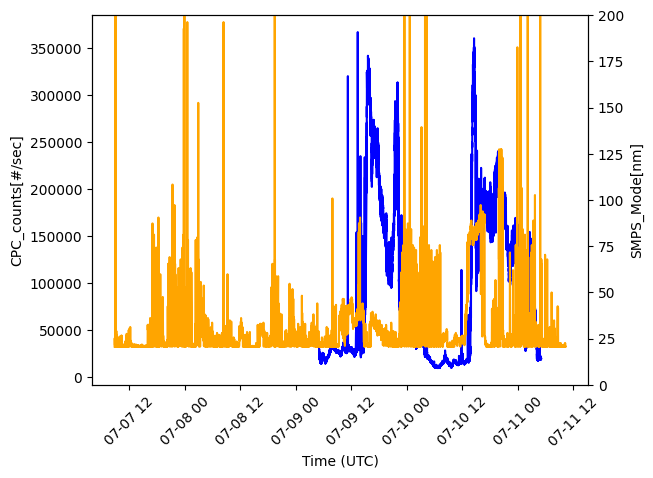

In [8]:
# get cpc data
cpc_time = lake['cpc'].datetime64
cpc_data = lake['cpc']['CPC_count[#/sec]']
# get smps data
smps_time = lake['smps_1d'].datetime64
smps_data = lake['smps_1d']['Mode_(nm)']

# plot the data on twinx axis
fig, ax = plt.subplots()
ax.plot(cpc_time,
        cpc_data,
        label='CPC',
        color='blue') 
plt.xticks(rotation=45)
axb = ax.twinx()
axb.plot(smps_time,
         smps_data,
         label='SMPS',
         color='orange',)
axb.set_ylim(0, 200)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel('CPC_counts[#/sec]')
axb.set_ylabel('SMPS_Mode[nm]')
plt.show()
fig.tight_layout()

 # Average the data

 Now that we have the data loaded, we can average the data over time. We'll use
 the 'particula.data.lake_stats' module to do this. The module has a function
 called 'averaged_std' that will take stream object and return a new stream
 object with the averaged data and the standard deviation of the data.

 If you recall this is the same naming convention as `stream_stats.average_std`
 which operates on stream objects.

In [9]:
lake_averaged = lake_stats.average_std(
    lake=lake,
    average_interval=600,
    clone=True)

print(lake_averaged)

Lake with streams: ['cpc', 'smps_1d', 'smps_2d']


 # Plot the Averaged Data

 get cpc data

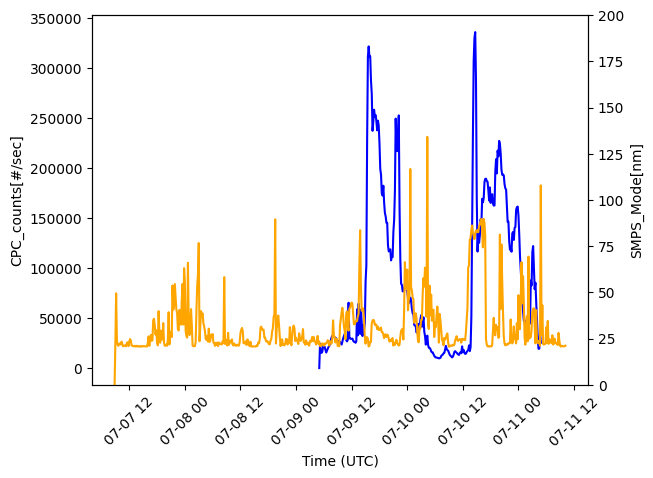

In [10]:
cpc_time = lake_averaged['cpc'].datetime64
cpc_data = lake_averaged['cpc']['CPC_count[#/sec]']
# get smps data
smps_time = lake_averaged['smps_1d'].datetime64
smps_data = lake_averaged['smps_1d']['Mode_(nm)']

# plot the data on twinx axis
fig, ax = plt.subplots()
ax.plot(cpc_time,
        cpc_data,
        label='CPC',
        color='blue')
plt.xticks(rotation=45)
axb = ax.twinx()
axb.plot(smps_time,
         smps_data,
         label='SMPS',
         color='orange',)
axb.set_ylim(0, 200)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel('CPC_counts[#/sec]')
axb.set_ylabel('SMPS_Mode[nm]')
plt.show()
fig.tight_layout()

# Summary
 This example showed how to load data from a folder and then average the data
 over time. The data was then plotted to show the difference between the
 averaged and non-averaged data.

In [11]:
help(Lake)

Help on class Lake in module particula.data.lake:

class Lake(builtins.object)
 |  Lake(streams: Dict[str, particula.data.stream.Stream] = <factory>) -> None
 |  
 |  A class representing a lake which is a collection of streams.
 |  
 |  Attributes:
 |      streams (Dict[str, Stream]): A dictionary to hold streams with their
 |      names as keys.
 |  
 |  Methods defined here:
 |  
 |  __delitem__(self, key: str) -> None
 |      Remove a stream by name.
 |      Example: del lake['stream_name']
 |  
 |  __dir__(self) -> list
 |      List available streams.
 |      Example: dir(lake)
 |  
 |  __eq__(self, other)
 |  
 |  __getattr__(self, name: str) -> Any
 |      Allow accessing streams as an attributes.
 |      Raises:
 |          AttributeError: If the stream name is not in the lake.
 |      Example: lake.stream_name
 |  
 |  __getitem__(self, key: str) -> Any
 |      Get a stream by name.
 |      Example: lake['stream_name']
 |  
 |  __init__(self, streams: Dict[str, particula.data.